### 2.2 Preliminary analysis : descriptive statistics

In [96]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import t
df = pd.read_csv('abalone_data.csv')
df_numeric = df.drop(columns=['Sex'])


1. How many observations abalones are described ? How many variables are there ?

In [76]:
print(df.head())
print()

num_observations = df.shape[0]
num_variables = df.shape[1]

print(f'Number of observations: {num_observations}')
print(f'Number of variables: {num_variables}')

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  

Number of observations: 4177
Number of variables: 9


2. Are there any missing values in the dataset ? If any, delete the observations with missing values.

In [33]:
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)
print()

df_cleaned = df.dropna()

missing_values_after_cleanup = df_cleaned.isnull().sum()
print('Missing values in each column after cleanup:')
print(missing_values_after_cleanup)
print()

print(f'Number of observations after removing missing values: {df_cleaned.shape[0]}')


Missing values in each column:
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Missing values in each column after cleanup:
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Number of observations after removing missing values: 4177


3. Calculate descriptive statistics for all the variables (mean, max, quartiles, etc.). Interpret the output statistics. Are there any qualitative variables ? If so, what are their categories ? You can use graphics of your choice to help you describe the data (boxplots, scatter plots, histograms, etc.). Interpret the graphics

Descriptive statistics:
         Sex       Length     Diameter       Height  Whole weight  \
count   4177  4177.000000  4177.000000  4177.000000   4177.000000   
unique     3          NaN          NaN          NaN           NaN   
top        M          NaN          NaN          NaN           NaN   
freq    1528          NaN          NaN          NaN           NaN   
mean     NaN     0.523992     0.407881     0.139516      0.828742   
std      NaN     0.120093     0.099240     0.041827      0.490389   
min      NaN     0.075000     0.055000     0.000000      0.002000   
25%      NaN     0.450000     0.350000     0.115000      0.441500   
50%      NaN     0.545000     0.425000     0.140000      0.799500   
75%      NaN     0.615000     0.480000     0.165000      1.153000   
max      NaN     0.815000     0.650000     1.130000      2.825500   

        Shucked weight  Viscera weight  Shell weight        Rings  
count      4177.000000     4177.000000   4177.000000  4177.000000  
unique     

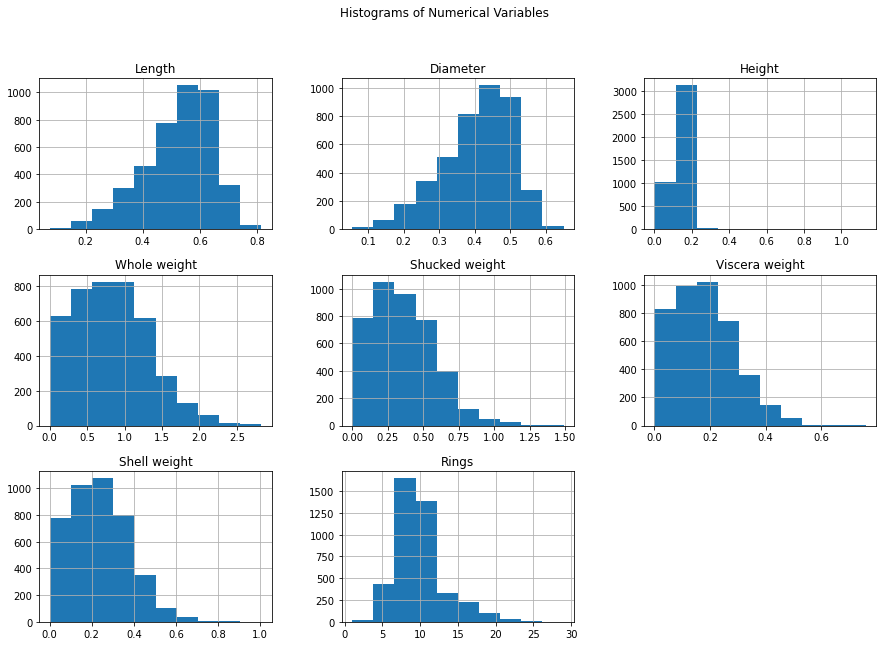

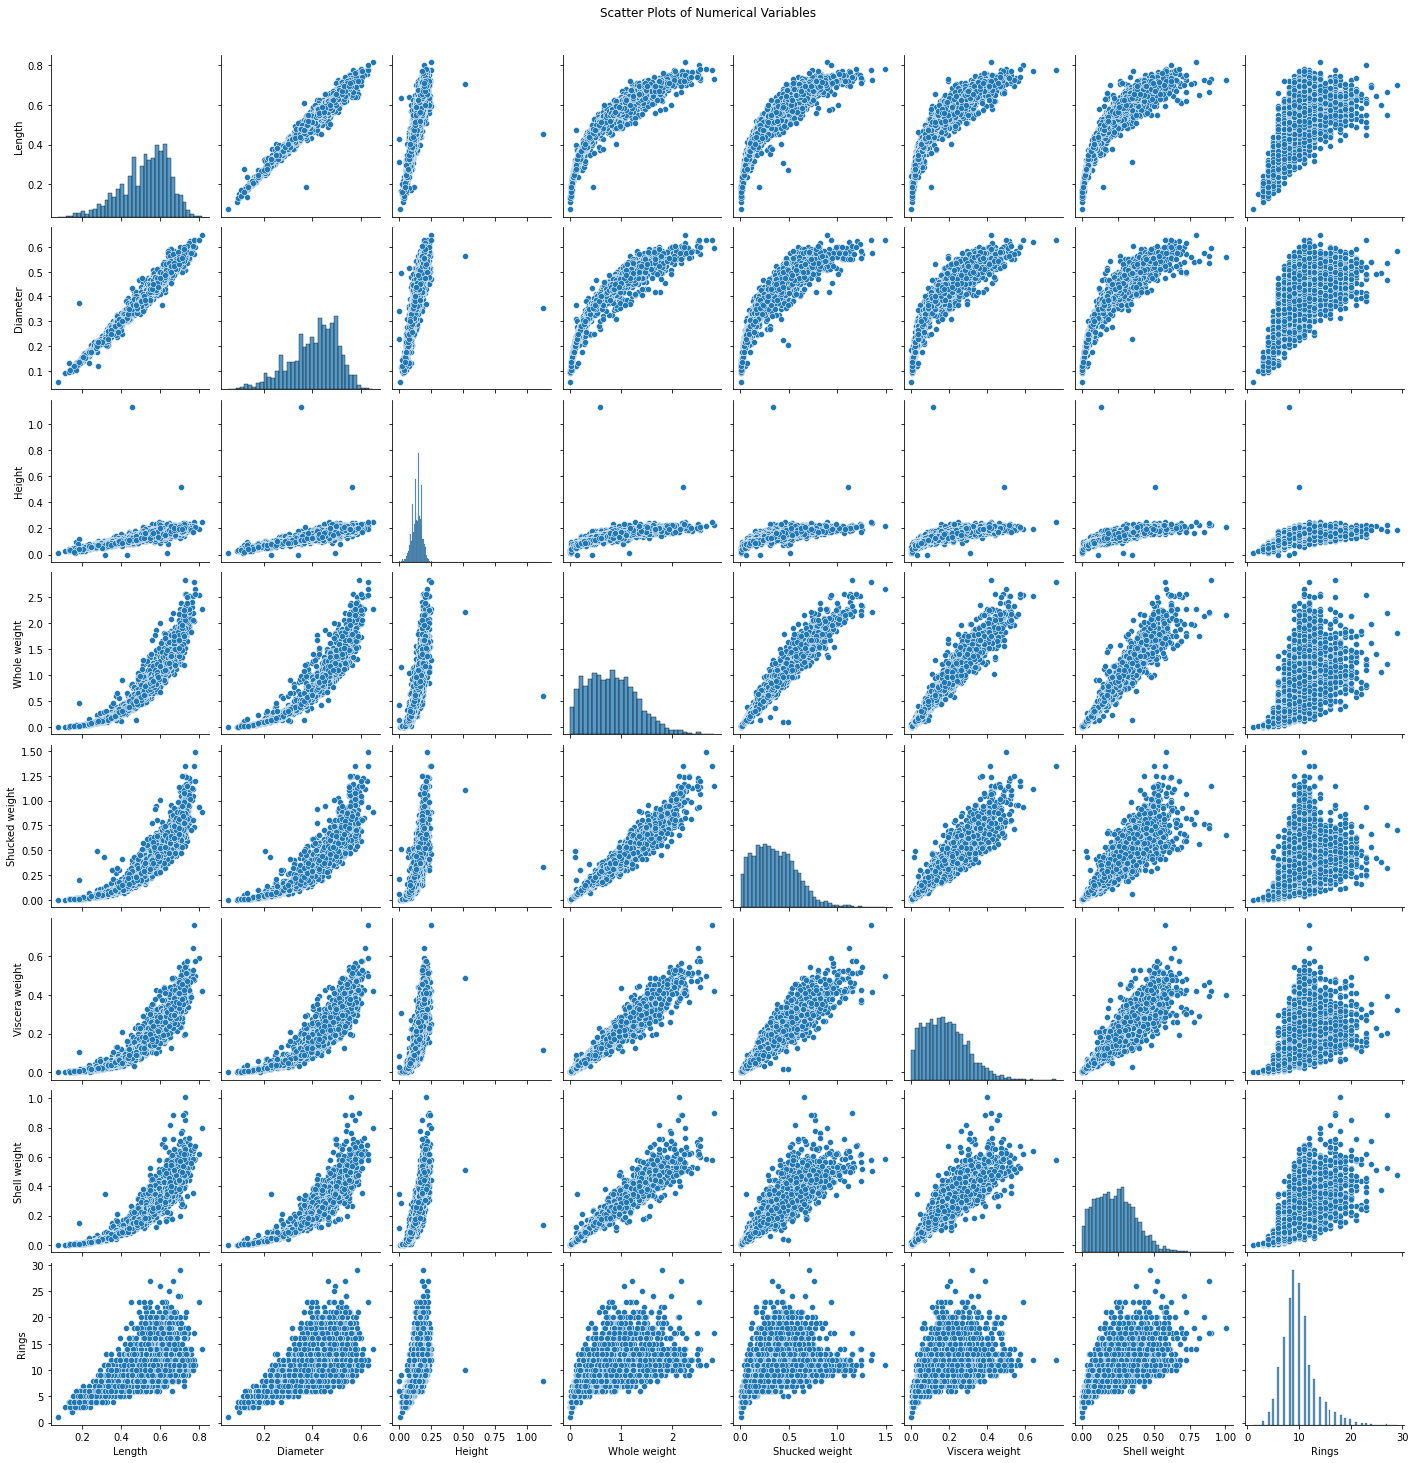

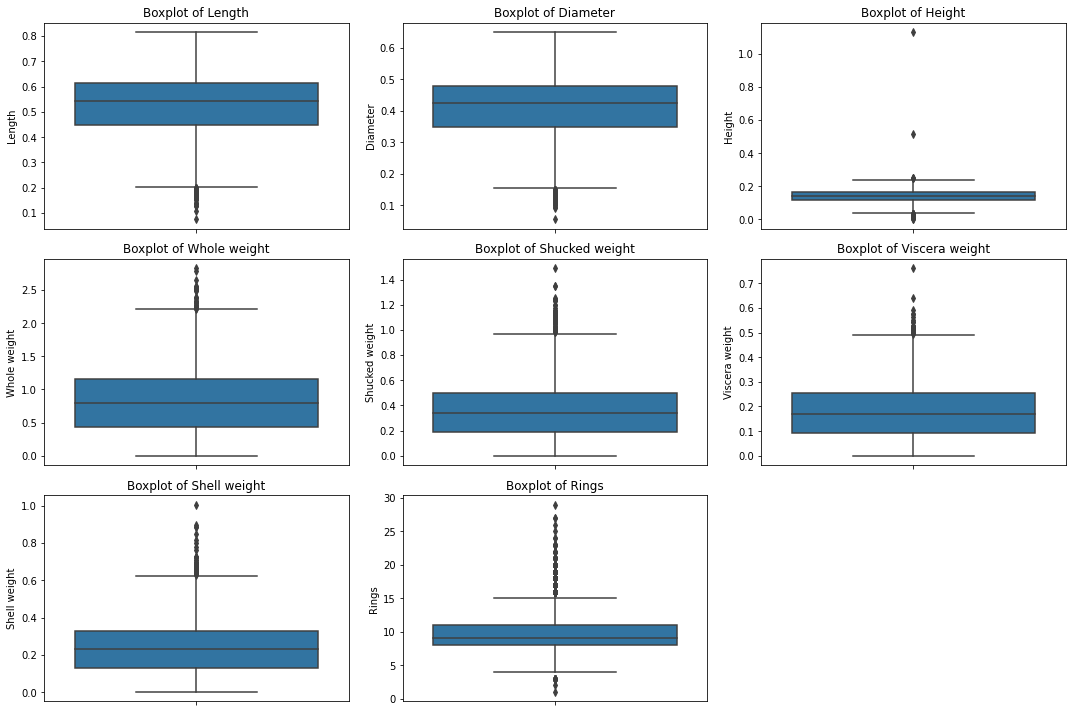

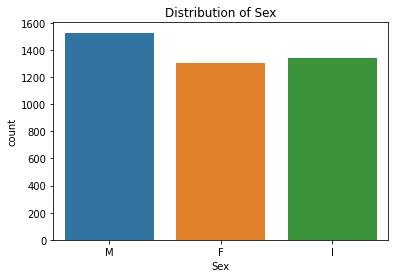

In [34]:
descriptive_stats = df_cleaned.describe(include='all')
print('Descriptive statistics:')
print(descriptive_stats)

qualitative_vars = df_cleaned.select_dtypes(include=['object']).columns
print(f'Qualitative variables: {qualitative_vars}')

for var in qualitative_vars:
    categories = df_cleaned[var].unique()
    print(f'Categories for {var}: {categories}')

df_cleaned.hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

sns.pairplot(df_cleaned)
plt.suptitle('Scatter Plots of Numerical Variables', y=1.02)
plt.show()

plt.figure(figsize=(15, 10))
for i, column in enumerate(df_cleaned.select_dtypes(include=['number']).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

for var in qualitative_vars:
    sns.countplot(x=var, data=df_cleaned)
    plt.title(f'Distribution of {var}')
    plt.show()

### 2.3 Principal Component Analysis (PCA)


1. Calculate the variance of each variable and interpret the results. Do you think it is necessary to standardize the variables before performing PCA for this dataset ? Why ?


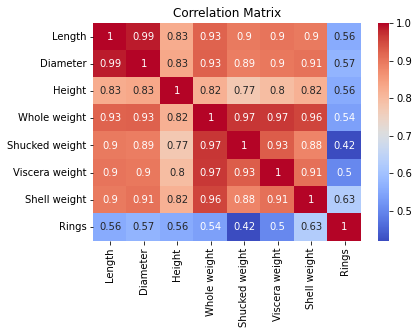

In [35]:
names = df.iloc[:, 0]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 1:])

correlation_matrix = pd.DataFrame(df_scaled, columns=df.columns[1:]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

2. Perform PCA using the appropriate function with the appropriate arguments and options considering your answer to the previous question. Analyze the output of the function. Interpret the values of the two first principal component loading vectors.

Explained variance by each component: [8.39054894e-01 8.69516209e-02 3.23053901e-02 2.07487304e-02
 1.06187080e-02 7.93409586e-03 1.58677048e-03 7.99790556e-04]


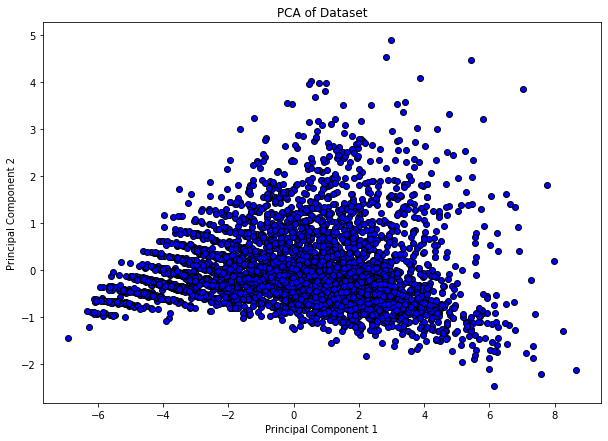

In [72]:
pca = PCA() # pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='blue', marker='o', edgecolor='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()

3. Calculate the percentage of variance explained (PVE) by each component ? Plot the PVE explained by each component, as well as the cumulative PVE. How many components would you keep ? Why ?

Percentage of Variance Explained (PVE) by each component:
PC1: 83.91%
PC2: 8.70%
PC3: 3.23%
PC4: 2.07%
PC5: 1.06%
PC6: 0.79%
PC7: 0.16%
PC8: 0.08%

Cumulative PVE by components:
PC1 to PC1: 83.91%
PC1 to PC2: 92.60%
PC1 to PC3: 95.83%
PC1 to PC4: 97.91%
PC1 to PC5: 98.97%
PC1 to PC6: 99.76%
PC1 to PC7: 99.92%
PC1 to PC8: 100.00%


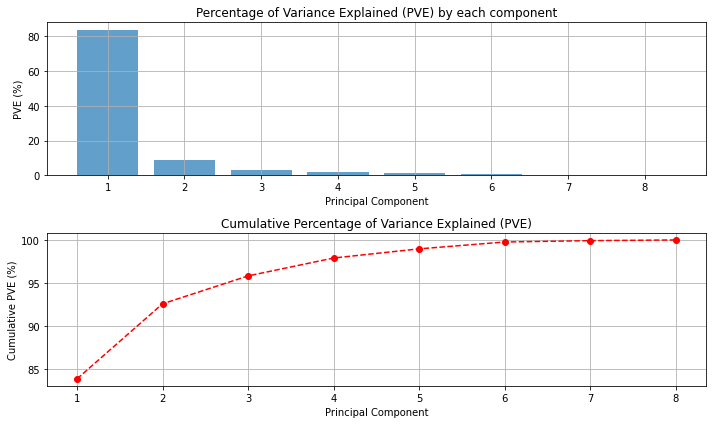


Number of components to keep to explain at least 95% of the variance: 3


In [73]:
explained_variance_ratio = pca.explained_variance_ratio_

pve = explained_variance_ratio * 100
cumulative_pve = np.cumsum(pve)

print('Percentage of Variance Explained (PVE) by each component:')
for i, pve_value in enumerate(pve):
    print(f'PC{i+1}: {pve_value:.2f}%')

print('\nCumulative PVE by components:')
for i, cum_pve_value in enumerate(cumulative_pve):
    print(f'PC1 to PC{i+1}: {cum_pve_value:.2f}%')

plt.figure(figsize=(10, 6))

# PVE
plt.subplot(2, 1, 1)
plt.bar(range(1, len(pve) + 1), pve, alpha=0.7, align='center', label='Individual PVE')
plt.ylabel('PVE (%)')
plt.xlabel('Principal Component')
plt.title('Percentage of Variance Explained (PVE) by each component')
plt.grid(True)

# Cumulative PVE
plt.subplot(2, 1, 2)
plt.plot(range(1, len(cumulative_pve) + 1), cumulative_pve, marker='o', linestyle='--', color='r', label='Cumulative PVE')
plt.ylabel('Cumulative PVE (%)')
plt.xlabel('Principal Component')
plt.title('Cumulative Percentage of Variance Explained (PVE)')
plt.grid(True)

plt.tight_layout()
plt.show()

threshold = 95
num_components = np.argmax(cumulative_pve >= threshold) + 1

print(f'\nNumber of components to keep to explain at least {threshold}% of the variance: {num_components}')

4. Use a biplot with a correlation circle to display both the principal component scores and the loading vectors in a single plot. Interpret the results.

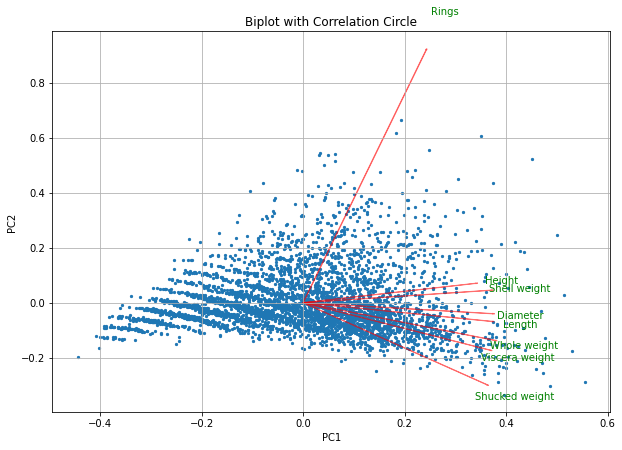

In [74]:
loadings = pca.components_.T

def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, f"Var{i+1}", color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

plt.figure(figsize=(10, 7))
biplot(principal_components, loadings, labels=df_numeric.columns)
plt.title('Biplot with Correlation Circle')
plt.show()

### 2.4 Linear Regression

In [90]:
df['Age'] = df['Rings'] + 1.5

Calculate the correlation coefficient between Age and each of the other variables (except Sex and Rings of course). Comment on the results. Which variable is the most correlated with the target Age ?

In [91]:
df_numeric = df.drop(columns=['Sex', 'Rings'])

correlation_matrix = df_numeric.corr()

correlation_with_age = correlation_matrix['Age'].sort_values(ascending=False)

print("Correlation coefficients with Age:\n")
print(correlation_with_age)

Correlation coefficients with Age:

Age               1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Age, dtype: float64


1. What are the coefficient estimates ? Interpret coefficient estimate ˆβ1.

Intercept (β0): 7.9621166469960745
Coefficient (β1): 14.535675260987182


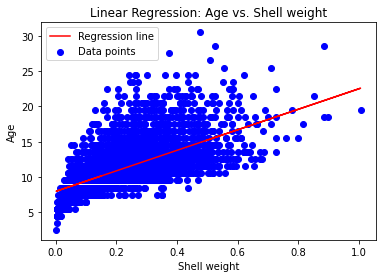

In [92]:
X = df[['Shell weight']].values
Y = df['Age'].values

model = LinearRegression()
model.fit(X, Y)

beta_0 = model.intercept_
beta_1 = model.coef_[0]

print(f"Intercept (β0): {beta_0}")
print(f"Coefficient (β1): {beta_1}")

plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.xlabel('Shell weight')
plt.ylabel('Age')
plt.title('Linear Regression: Age vs. Shell weight')
plt.legend()
plt.show()

2. Give the general expression of a 1 − α confidence interval for the parameter β1. Calculate the 95% confidence interval for this coefficient. Interpret the results.

In [97]:
beta_1_hat = model.coef_[0]

X_with_const = sm.add_constant(X)

sm_model = sm.OLS(Y, X_with_const).fit()
beta_1_se = sm_model.bse[1]

alpha = 0.05
n = len(Y)
t_critical = t.ppf(1 - alpha/2, df=n-2)

ci_lower = beta_1_hat - t_critical * beta_1_se
ci_upper = beta_1_hat + t_critical * beta_1_se

print(f"Estimated coefficient (β1): {beta_1_hat}")
print(f"Standard error of β1: {beta_1_se}")
print(f"Critical t-value: {t_critical}")
print(f"95% confidence interval for β1: [{ci_lower}, {ci_upper}]")

Estimated coefficient (β1): 14.535675260987182
Standard error of β1: 0.2790823340673428
Critical t-value: 1.9605323551806582
95% confidence interval for β1: [13.988525315288818, 15.082825206685545]
